# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [36]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [37]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [38]:
A@e_1 
# Selects the the first column of A (1,4,7) 
# This is because the row vector is multiplied by each row, summing the multiplicative results of each element in the row times each corresponding element in the column vector.
# Since the second two elements in the column vector are 0, the second two elements in each row multiply to zero, leaving only the items in the first column in the summation.

array([1, 4, 7])

In [39]:
A@e_2
# Selects the second column of A (2,5,8) for the same reasons.

array([2, 5, 8])

In [40]:
A@e_3
# Selects the third column of A (3,6,9) for the same reasons.

array([3, 6, 9])

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [41]:
u = np.ones(3)

In [42]:
A@u
# This result is just addition across rows.
# In matrix multiplication, each element of the column vector is multiplied by the element in x that has the same column # as the first vector has for its row #.
# Then each of these results are added across the row.
# Since all elements of u are 1, it is just the elements in each row of A added together.

array([ 6., 15., 24.])

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [43]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


In [44]:
A@x
# It results in vector x itself. 
# This is because the identity matrix, when multiplied by x, only selects the first element from the first row of x, the second element from the second row of x, etc.
# Nothing leads to adding across rows because every element in the identiyy matrix except one is zero.


array([-2,  4, 11])

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [45]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


In [46]:
A@x
# This takes the elements in array x and shuffles them around, since only the 11 is "saved" (not multiplied by 0) by the first row of A, etc.

array([11, -2,  4])

In [47]:
B = np.array([ [0,1,0],
              [0,0,1],
              [1,0,0]])
B@x

array([ 4, 11, -2])

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [48]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [49]:
A@e_1
# This is the first column - all the proportions of observations who moved from state 0 (j, column #) to another state (i, row #).

array([0.50052958, 0.02574731, 0.47372311])

In [50]:
A@e_2
# This is the second column - all the proportions of observations who moved from state 1 (j, column #) to another state (i, row #).

array([0.24049286, 0.39251588, 0.36699127])

In [51]:
A@e_3
# This is the third column - all the proportions of observations who moved from state 2 (j, column #) to another state (i, row #).

array([0.18358131, 0.37907577, 0.43734292])

f. For each of the vectors $e_1, e_2, e_3$, multiply $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [52]:
def mult(v1, v2):
    return v1@v2

def mult_mult(v1, v2, x):
    results = []
    for _ in range(1, x+1):
        results.append(np.linalg.matrix_power(v1, _) @ v2)
    return results

print(mult_mult(A, e_1, 5))

# Some help from ChatGPT here comprehending how to use recursion to multiply A by the result each time and using np.linalg.matrix_power - CNK

[array([0.50052958, 0.02574731, 0.47372311]), array([0.34368862, 0.20257047, 0.45374091]), array([0.30404142, 0.26036337, 0.43559521]), array([0.29476439, 0.27514859, 0.43008701]), array([0.29266551, 0.27862515, 0.42870935])]


In [53]:
print(mult_mult(A, e_2, 5))

[array([0.24049286, 0.39251588, 0.36699127]), array([0.28214379, 0.29937825, 0.41847795]), array([0.29004438, 0.28341002, 0.42654561]), array([0.29163968, 0.2804039 , 0.42795643]), array([0.29197422, 0.27979983, 0.42822595])]


In [54]:
print(mult_mult(A, e_3, 5))

[array([0.18358131, 0.37907577, 0.43734292]), array([0.26334088, 0.31930609, 0.41735304]), array([0.28521895, 0.29032145, 0.4244596 ]), array([0.29050361, 0.28220175, 0.42729464]), array([0.29171646, 0.2802254 , 0.42805814])]


In [55]:
# The arrays all come out to about the same values as compared to each other. 
# This shows that chains settle down into 'long-run proportions' - the dependence on initial conditions gets very small to null. This is the general rule of a Markov chain.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [56]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [57]:
s1 = [1,0]
T@s1 
# The result is [(1*0.25 + 0*0.5), (1*0.75 + 0*0.5)].
# This means that 25% of the time, the transition from state 1 to state 1 will occur (ie no state change) and 75% of the time, the transition from state 1 to state 2 will occur.

array([0.25, 0.75])

In [58]:
T@(T@s1)
# Pre multiply by T (not post)
# This means that the probability that a state that went from 1 to 1 will stay at 1 is 43.75% and the probability that a state that went from 1 to 2 will stay at state 2 is 56.25%.
# The rest of the possibilities are implied by this.

array([0.4375, 0.5625])

In [59]:
print(mult_mult(T, s1, 5))

# Settles out by third iteration


[array([0.25, 0.75]), array([0.4375, 0.5625]), array([0.390625, 0.609375]), array([0.40234375, 0.59765625]), array([0.39941406, 0.60058594])]


In [60]:
s2 = [0,1]

print(mult_mult(T, s2, 5))

# Also settles out by third iteration to about the same proportions as starting at s1

[array([0.5, 0.5]), array([0.375, 0.625]), array([0.40625, 0.59375]), array([0.3984375, 0.6015625]), array([0.40039062, 0.59960938])]


3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [61]:
import pandas as pd

weather = pd.read_csv("cville_weather.csv")

weather.info()
# Most datatypes are objects; a few are floats. 
# SNWD and SNWD_ATTRIBUTES only have one non-null entry each. This is curious...
# DAPR, DAPR_ATTRIBUTRES, MDPR, MDPR_ATTRIBUTES are missing the second-most data, with only 12 non null entries for each.
# Other columns are also missing some data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          411 non-null    object 
 1   NAME             411 non-null    object 
 2   DATE             411 non-null    object 
 3   DAPR             12 non-null     float64
 4   DAPR_ATTRIBUTES  12 non-null     object 
 5   MDPR             12 non-null     float64
 6   MDPR_ATTRIBUTES  12 non-null     object 
 7   PRCP             399 non-null    float64
 8   PRCP_ATTRIBUTES  399 non-null    object 
 9   SNOW             223 non-null    float64
 10  SNOW_ATTRIBUTES  223 non-null    object 
 11  SNWD             1 non-null      float64
 12  SNWD_ATTRIBUTES  1 non-null      object 
dtypes: float64(5), object(8)
memory usage: 41.9+ KB


In [62]:
#Generating transition matrix:
# Sort by date
weather["rain"] = weather["PRCP"] > 0 
markov_subset_df = weather[["DATE", "rain"]]
markov_subset_df = markov_subset_df.sort_values('DATE')
# Genersate a next state
markov_subset_df['next_state'] = markov_subset_df['rain'].shift(-1)
# Create a df of all the transitions
df_transitions = markov_subset_df[:-1].copy()
transition_counts = pd.crosstab(
    df_transitions['rain'], 
    df_transitions['next_state'],
    rownames=['Current State'],
    colnames=['Next State']
)
# Normalize
rain_transition_matrix = transition_counts.div(transition_counts.sum(axis=1), axis=0)
rain_transition_matrix

Next State,False,True
Current State,,
False,0.762931,0.237069
True,0.308989,0.691011


If it rained yesterday, there is a 69.1% chance of it raining today. If it was clear yesterday, there is a 30.8% chance.

In [63]:
rain_transition_matrix.shape

(2, 2)

In [64]:
class MarkovChain: 
    """
    A class to build a Markov chain
    """   
    def __init__(self, transition_matrix, state_names=None):
        # Initialize the transition matrix and the state names, as well as the number of states
        self.transition_matrix = np.array(transition_matrix)
        self.n_states = self.transition_matrix.shape[0]
        self.states = state_names
    
    def simulate(self, n_steps, initial_state=0):
        """
        A function to simulate random weather progression (rain or cloudy) for a given number of days 
        given the probability from the previously generated transition matrix
        """
        # Set initial state
        current_state = initial_state
        # Start chain
        path = [current_state]
        # Simulate random chain
        for step in range(n_steps):
            # Get the probability of each state change
            probabilities = self.transition_matrix[current_state]
            # Normalize to ensure sum = 1.0
            probabilities = probabilities / probabilities.sum()
            # Randomly choose a state with that probability
            current_state = np.random.choice(self.n_states, p=probabilities)
            path.append(current_state)
        #return chain
        return [self.states[i] for i in path]
    
    def steps_to_convergence(self, initial_state=0, tolerance=1e-6, max_steps=10000):
        """
        A function to calculate how many steps the chain takes to converge 
        to the same matrix regardless of initial state (a common property of a Markov chain)
        """

        #Compute steady state (left eigenvector with eigenvalue 1)
        eigenvalues, eigenvectors = np.linalg.eig(self.transition_matrix.T)
        steady_idx = np.argmax(np.abs(eigenvalues - 1) < 1e-10)
        steady_state = np.real(eigenvectors[:, steady_idx])
        steady_state = steady_state / steady_state.sum()

        #setup
        current_dist = np.zeros(self.n_states)
        current_dist[initial_state] = 1.0
        
        # Iterate
        for step in range(1, max_steps + 1):
            current_dist = current_dist @ self.transition_matrix
            
            if np.sum(np.abs(current_dist - steady_state)) < tolerance:
                return step

        
        return max_steps  # Did not converge within max_steps
    
    def forecast(self, n_steps, initial_state=0):
        """
        Forecast the weather for any given day in the future given an initial state
        """
        # Create initial distribution vector
        current_dist = np.zeros(self.n_states)
        current_dist[initial_state] = 1.0
        
        future_dist = current_dist @ np.linalg.matrix_power(self.transition_matrix, n_steps)
        return future_dist

In [65]:
rain_markov_chain = MarkovChain(transition_matrix=rain_transition_matrix,state_names=["clear", "rain"])
print(f"If the weather is raining, steps to convergence is: {rain_markov_chain.steps_to_convergence(initial_state=1, tolerance = 0.001)}")
print(f"If the weather is clear, steps to convergence is: {rain_markov_chain.steps_to_convergence(initial_state=0, tolerance = 0.001)}")

If the weather is raining, steps to convergence is: 9
If the weather is clear, steps to convergence is: 9


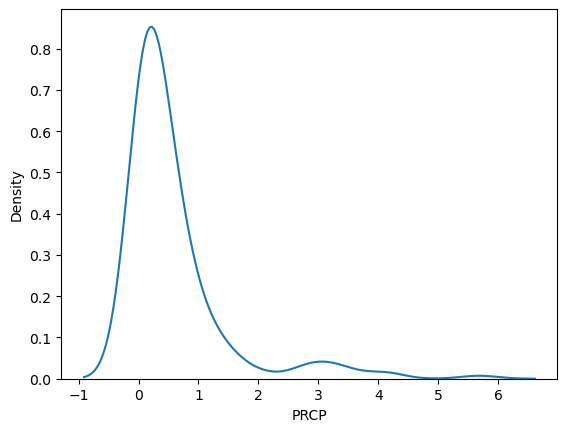

In [66]:
# Conditional on being rainy, plot a KDE of the `PRCP` variable.

# How do I incorporate the condition of it being rainy? I think the way I did it is wrong but incorporating Markov chain into this seems too complicated for our purview.

import seaborn as sns

my_kde = sns.kdeplot(weather.loc[weather['rain'] == 1]['PRCP'])

## Improving Model Accuracy
One way of improving the accuracy of the markov chain would be to increase the number of previous days the model tracks. By increasing the number of days tracked, you have a higher statespace and therefore a more nuanced state associated with the real life phenomenon. However, this comes with computational expense as the transition matrix grows exponentially in size.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [67]:
# %%
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [69]:

# Load the .pkl file
with open('data/taxicab.pkl', 'rb') as file:
    data = pickle.load(file)

# Convert to DataFrame
data_reset = [series.reset_index(drop=True) for series in data]
df = pd.concat(data_reset, axis=1, ignore_index=True)
df.columns = [f'series_{i}' for i in range(len(data))]
print("DataFrame shape:", df.shape)
print("First few rows:\n", df.head())


DataFrame shape: (38344, 1000)
First few rows:
             series_0      series_1           series_2           series_3  \
0  Outside Manhattan       Midtown            Chelsea  Greenwich Village   
1  Outside Manhattan      Kips Bay    Upper East Side        East Harlem   
2  Outside Manhattan      Kips Bay    Upper East Side            Midtown   
3  Outside Manhattan  East Village  Outside Manhattan  Outside Manhattan   
4  Outside Manhattan  East Village  Outside Manhattan  Outside Manhattan   

            series_4           series_5         series_6         series_7  \
0  Battery Park City            Midtown  Upper East Side  Upper West Side   
1       East Village            Midtown  Upper East Side  Upper East Side   
2       East Village            Midtown  Upper East Side  Upper East Side   
3           Gramercy  Flatiron District  Upper East Side          Midtown   
4           Gramercy       East Village          Midtown          Midtown   

            series_8           s

1 State Space and Cleaning Sequences
 
The state space consists of 38 Manhattan neighborhoods (e.g., Midtown, Upper East Side, Hell's Kitchen) plus 'outside manhattan'. The sequences were cleaned by converting neighborhood names to lowercase, stripping whitespace, and excluding invalid entries. The data, stored in a DataFrame of shape (38344, 1000), was processed to ensure only valid Manhattan neighborhoods were used for analysis.

In [70]:
# Get unique neighborhoods from all columns
all_neighborhoods = set()
for col in df.columns:
    all_neighborhoods.update(df[col].str.lower().str.strip().dropna())
states = list(all_neighborhoods)
S = len(states)
print("\nState space (Manhattan neighborhoods):", states)
print("Number of states:", S)



State space (Manhattan neighborhoods): ['theater district', 'central park', 'midtown', 'noho', 'murray hill', 'financial district', 'roosevelt island', 'upper east side', 'kips bay', 'inwood', "randall's island", 'gramercy', 'harlem', 'chelsea', 'morningside heights', 'stuyvesant town', 'marble hill', 'civic center', 'east harlem', 'governors island', 'lower east side', 'soho', 'liberty island', 'two bridges', 'battery park city', 'little italy', 'upper west side', 'outside manhattan', 'flatiron district', 'washington heights', 'west village', "hell's kitchen", 'chinatown', 'east village', 'nolita', 'tribeca', 'ellis island', 'greenwich village']
Number of states: 38


2 Transition Matrix and Heatmap

The transition matrix was computed, showing probabilities of moving between neighborhoods (column-normalized, so columns sum to 1). A heatmap visualizes these probabilities, with darker shades indicating higher likelihoods. Strong diagonal probabilities (e.g., Midtown: 0.36, Chelsea: 0.33, Upper East Side: 0.46, Upper West Side: 0.42, outside Manhattan: 0.51) indicate cabs frequently stay within these neighborhoods, reflecting high local demand. Significant off-diagonal probabilities, such as Liberty Island -> Gramercy (1.00), Ellis Island -> outside Manhattan (0.33), Governors Island -> outside Manhattan (0.33), and Morningside Heights -> Upper West Side (0.35), show frequent trips between specific areas.


Transition Matrix:
                      theater district  central park  midtown  noho  \
theater district                 0.21          0.04     0.05  0.01   
central park                     0.02          0.14     0.01  0.00   
midtown                          0.21          0.19     0.36  0.09   
noho                             0.00          0.00     0.00  0.14   
murray hill                      0.02          0.01     0.04  0.03   
financial district               0.01          0.00     0.01  0.02   
roosevelt island                 0.00          0.00     0.00  0.00   
upper east side                  0.06          0.20     0.13  0.04   
kips bay                         0.01          0.00     0.02  0.03   
inwood                           0.00          0.00     0.00  0.00   
randall's island                 0.00          0.00     0.00  0.00   
gramercy                         0.01          0.01     0.02  0.05   
harlem                           0.01          0.01     0.00  0.00   

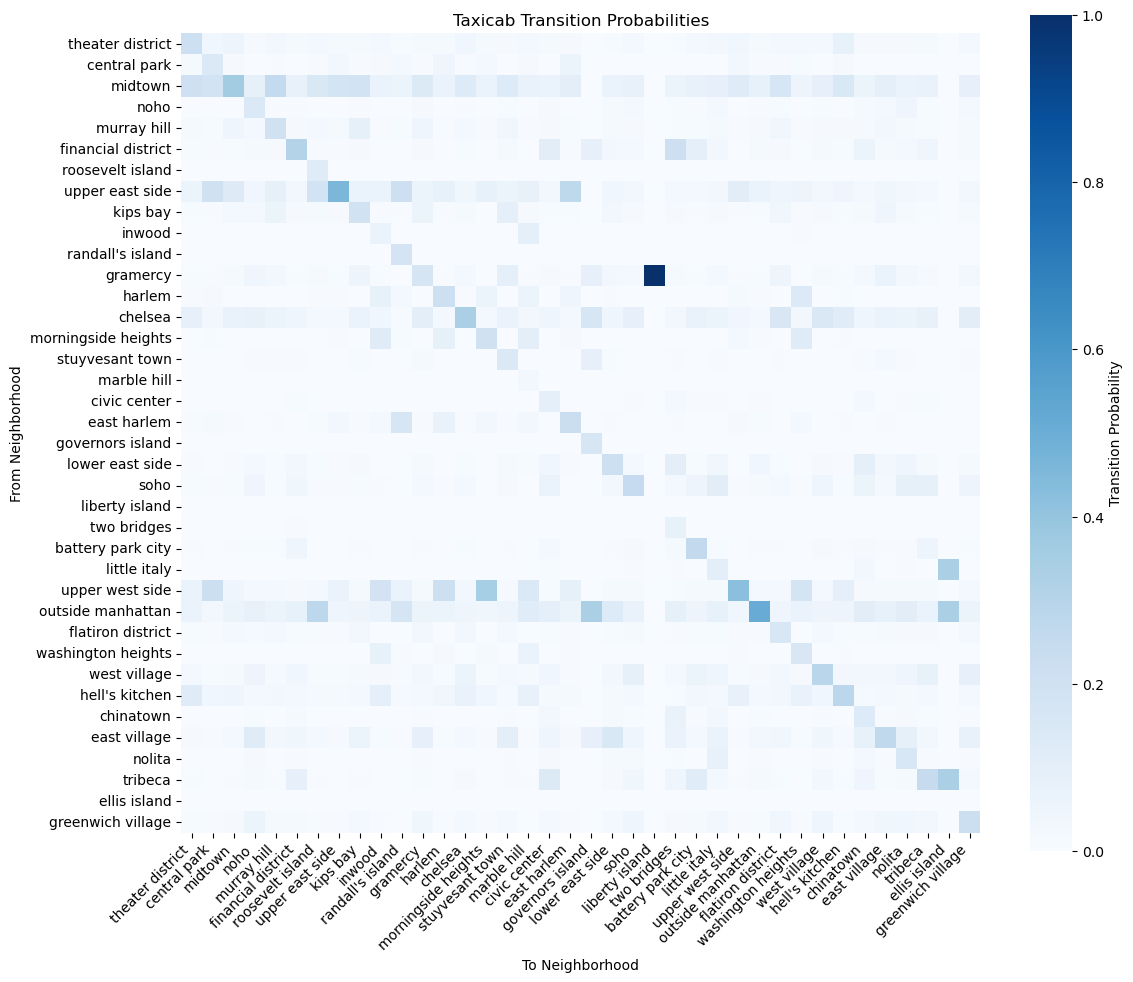


Most common routes:
liberty island -> gramercy: 1.00
outside manhattan -> outside manhattan: 0.51
upper east side -> upper east side: 0.46
upper west side -> upper west side: 0.42
midtown -> midtown: 0.36
morningside heights -> upper west side: 0.35
chelsea -> chelsea: 0.33
ellis island -> tribeca: 0.33
governors island -> outside manhattan: 0.33
ellis island -> little italy: 0.33


In [71]:
tr_counts = np.zeros((S, S))
for col in df.columns:
    col_seq = df[col].str.lower().str.strip().dropna()
    col_seq = col_seq[col_seq.isin(all_neighborhoods)].values
    for t in range(1, len(col_seq)):
        if col_seq[t-1] in states and col_seq[t] in states:
            index_from = states.index(col_seq[t-1])
            index_to = states.index(col_seq[t])
            tr_counts[index_to, index_from] += 1

# Transition probabilities (rows sum to 1)
sums = tr_counts.sum(axis=0, keepdims=True)
tr_pr = np.divide(tr_counts, sums, out=np.zeros_like(tr_counts), where=sums!=0)
tr_df = pd.DataFrame(np.round(tr_pr, 2), index=states, columns=states)
print("\nTransition Matrix:\n", tr_df)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, cmap='Blues', square=True, xticklabels=states, yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})
plt.title('Taxicab Transition Probabilities')
plt.xlabel('To Neighborhood')
plt.ylabel('From Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Most common routes
print("\nMost common routes:")
tr_flat = tr_pr.flatten()
top_indices = np.argsort(tr_flat)[-10:][::-1]
for idx in top_indices:
    i, j = divmod(idx, S)
    print(f"{states[j]} -> {states[i]}: {tr_pr[i, j]:.2f}")


3 Why Taxicabs Are Likely Order 1

Taxicabs are modeled as a first-order Markov chain because the next destination depends primarily on the current location and immediate factors like passenger demand or proximity, not prior trip history. Higher-order models (e.g., order 2) are unnecessary as they add complexity without significant predictive gain, given that passenger requests and driver decisions are largely independent of earlier trips.

4 Forecasting from Hell’s Kitchen
 
Starting from Hell’s Kitchen, the probability distribution after 2, 3, 5, and 10 trips was computed using the transition matrix. After 2 trips, the top neighborhoods are Midtown (0.17), Hell’s Kitchen (0.12), and Chelsea (0.11). By 10 trips, the distribution stabilizes, with Midtown (0.17), Upper East Side (0.12), and outside Manhattan (0.10) being the most likely, indicating a shift toward high-demand areas.



In [72]:
try:
    hk_idx = states.index("hell's kitchen")
except ValueError:
    print("Warning: Hell's Kitchen not in states. Using first state instead.")
    hk_idx = 0
initial = np.zeros(S)
initial[hk_idx] = 1
print("\nForecasts from Hell's Kitchen:")
vec = initial
for i in range(10):
    vec = tr_pr @ vec
    if i+1 in [2, 3, 5, 10]:
        top3 = np.argsort(vec)[-3:][::-1]
        print(f"After {i+1} trips:", {states[idx]: round(vec[idx], 2) for idx in top3})



Forecasts from Hell's Kitchen:
After 2 trips: {'midtown': np.float64(0.17), "hell's kitchen": np.float64(0.12), 'chelsea': np.float64(0.11)}
After 3 trips: {'midtown': np.float64(0.17), 'upper east side': np.float64(0.11), 'chelsea': np.float64(0.1)}
After 5 trips: {'midtown': np.float64(0.17), 'upper east side': np.float64(0.12), 'outside manhattan': np.float64(0.1)}
After 10 trips: {'midtown': np.float64(0.17), 'upper east side': np.float64(0.12), 'outside manhattan': np.float64(0.1)}



5 Long-Run Distribution
 
Iterating from a uniform distribution, the Markov chain converged after 7 steps to a stationary distribution. Cabs spend the most time in Midtown (0.17), Upper East Side (0.12), outside Manhattan (0.10), Chelsea (0.09), and Upper West Side (0.08), reflecting high passenger demand and trip frequency in central and popular neighborhoods.



In [73]:
vec = np.ones(S) / S
for i in range(50):
    vec_new = tr_pr @ vec
    if np.max(np.abs(vec_new - vec)) < 0.001:
        print(f"\nConverged at step {i+1}")
        break
    vec = vec_new
top5 = np.argsort(vec)[-5:][::-1]
print("Long-run distribution (top 5 neighborhoods):", {states[idx]: round(vec[idx], 2) for idx in top5})


Converged at step 7
Long-run distribution (top 5 neighborhoods): {'midtown': np.float64(0.17), 'upper east side': np.float64(0.12), 'outside manhattan': np.float64(0.1), 'chelsea': np.float64(0.09), 'upper west side': np.float64(0.08)}
